In [12]:
# import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sb
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

path = '/Users/nicolelubaczewska/Downloads/ba222Project_CleanData_12December.csv'
aa = pd.read_csv(path)

aa.rename(columns={'Source of Income': 'SourceofIncome'}, inplace=True)

# Foreward 
# -99 is considered as no response 

aa.columns

Index(['Unnamed: 0', 'Food_spending', 'Income', 'Allowance_month',
       'SourceofIncome', 'Other_Income', 'Work', 'DiningPlan',
       'Other_DiningPlan', 'Breakfast', 'Lunch', 'Snack', 'Dinner', 'Other',
       'Mealbox', 'Starbucks', 'CityCo', 'Dunkin', 'Breadwinners',
       'Baystate Underground', 'Law School Cafe', 'Einstein Bros. Bagels',
       'Subway', 'Basho', 'Late Night Cafe Warren', 'Raising Canes',
       'Healthy Blends', 'Late Night Cafe West', 'Greens & Grains', 'CRB',
       'Open Kitchen', 'Rhetts', 'The Halal Guys', 'Panda',
       'Late Night Kitchen Fenway', 'Meals_Amount', 'Travel', 'Travel_Other',
       'Age', 'Living', 'Gender', 'International', 'BU_Status'],
      dtype='object')

In [13]:
aa['Breakfast'].value_counts()

False    115
True      21
Name: Breakfast, dtype: int64

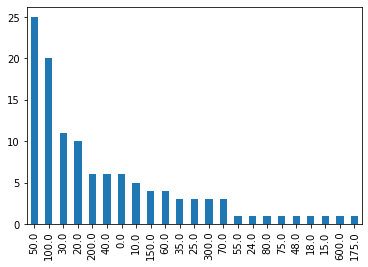

In [14]:
aa['Food_spending'].value_counts().plot(kind = 'bar')
plt.show()

In [15]:
#plt.scatter(aa['Food_spending'], alpha = 0.2)
#plt.show()

In [16]:
print (aa['Food_spending'].mean())
print (aa['Food_spending'].median())
print (aa['Food_spending'].std())

71.94915254237289
50.0
78.4140715892709


In [17]:
[70-aa['Food_spending'].std(),70+aa['Food_spending'].std()]

[-8.414071589270904, 148.41407158927092]

In [18]:
#Food spending it seems averages around 70 

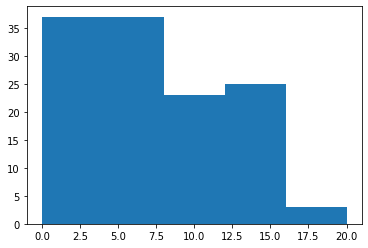

In [19]:
plt.hist(aa.Meals_Amount, bins = range (0,22,4)) 
plt.show()


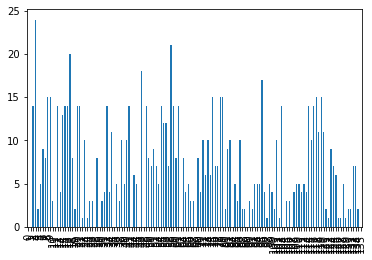

In [20]:
aa['Meals_Amount'].plot(kind = 'bar')
plt.show()



In [21]:
# Overwhelmingly people eat typically 14 meals per day

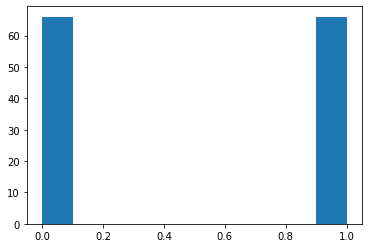

In [22]:
plt.hist(aa['Living']) 
plt.show()


In [23]:
# Close split between living on & off campus

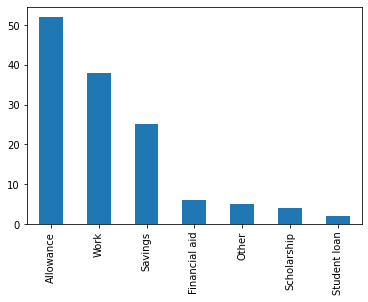

In [25]:
aa['SourceofIncome'].value_counts().plot(kind = 'bar')
plt.show()

# Most typical observations are Allowance & Work

In [26]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 136 non-null    int64  
 1   Food_spending              118 non-null    float64
 2   Income                     132 non-null    float64
 3   Allowance_month            123 non-null    float64
 4   SourceofIncome             132 non-null    object 
 5   Other_Income               3 non-null      object 
 6   Work                       133 non-null    object 
 7   DiningPlan                 133 non-null    object 
 8   Other_DiningPlan           0 non-null      float64
 9   Breakfast                  136 non-null    bool   
 10  Lunch                      136 non-null    bool   
 11  Snack                      136 non-null    bool   
 12  Dinner                     136 non-null    bool   
 13  Other                      131 non-null    object 

In [27]:
smf.ols('Food_spending ~ Income', data = aa).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Food_spending   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.05161
Date:                Mon, 19 Dec 2022   Prob (F-statistic):              0.821
Time:                        17:03:22   Log-Likelihood:                -676.10
No. Observations:                 117   AIC:                             1356.
Df Residuals:                     115   BIC:                             1362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.0063     13.558      5.532      0.000      48.151     101.862
Income        -0.6856      3.018     -0.227      0.821      -6.664       5.293
==============================================================================
Omnibus:                      115.158   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1581.152
Skew:                           3.372   Prob(JB):                         0.00
Kurtosis:                      19.699   Cond. No.                         8.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

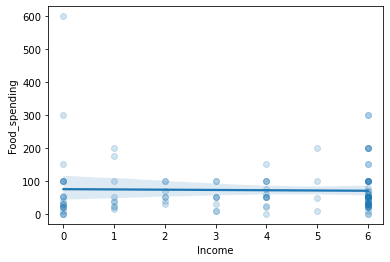

In [6]:
sb.regplot(x = aa.Income, y = aa.Food_spending,scatter_kws = {'alpha': 0.2} )
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U9'), dtype('float64')) -> None

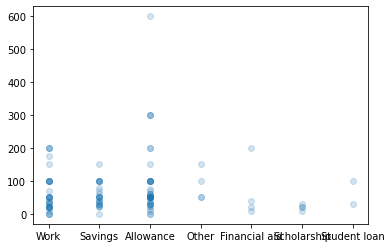

In [4]:
sb.regplot(x = aa['SourceofIncome'], y = aa.Food_spending,scatter_kws = {'alpha': 0.2} )
plt.show()

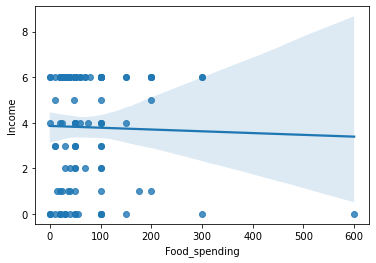

In [19]:
sb.regplot(x = aa.Food_spending, y = aa.Income)
plt.show()

In [28]:
reg1=smf.ols('Food_spending ~ Income', data = aa).fit()
reg2 = smf.ols('Income ~ Food_spending', data = aa).fit()

In [29]:
reg1.params

Intercept    75.006313
Income       -0.685640
dtype: float64

In [30]:
reg2.params

Intercept        3.833698
Food_spending   -0.000654
dtype: float64

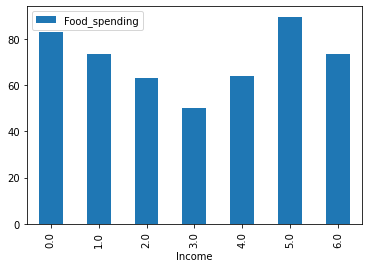

In [31]:
aa[['Food_spending','Income']].groupby('Income').agg('mean').plot(kind = 'bar')
plt.show()

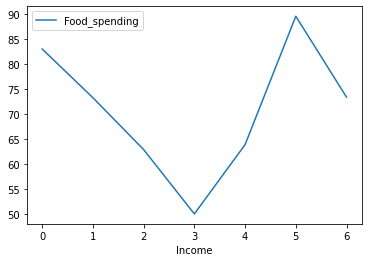

In [32]:
aa[['Food_spending','Income']].groupby('Income').agg('mean').plot()
plt.show()

In [29]:
reg1.rsquared

0.0006382901353404469

In [30]:
reg2.rsquared

0.0006382901353404469

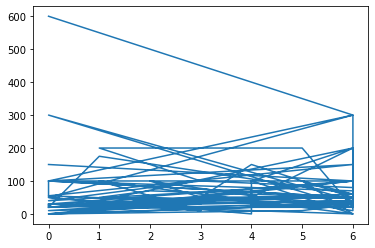

In [31]:
plt.plot(aa.Income, aa.Food_spending)
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Food_spending'>

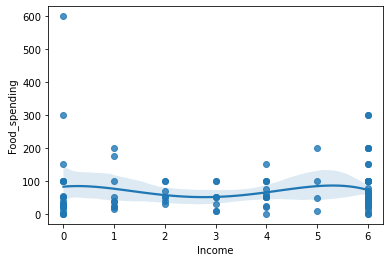

In [35]:
sb.regplot(x=aa.Income,y=aa.Food_spending, order =4)

In [38]:
reg3= smf.ols('Food_spending~Income',data=aa).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Food_spending   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                   0.07409
Date:                Sat, 10 Dec 2022   Prob (F-statistic):              0.786
Time:                        01:36:38   Log-Likelihood:                -681.52
No. Observations:                 118   AIC:                             1367.
Df Residuals:                     116   BIC:                             1373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.1558     13.512      5.562      0.000      48.394     101.917
Income        -0.8160      2.998     -0.272      0.786      -6.754       5.122
==============================================================================
Omnibus:                      116.137   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1608.196
Skew:                           3.380   Prob(JB):                         0.00
Kurtosis:                      19.775   Cond. No.                         8.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
reg4= smf.ols('Food_spending~Income+I(Income**2)',data=aa).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Food_spending   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.4668
Date:                Sat, 10 Dec 2022   Prob (F-statistic):              0.628
Time:                        01:37:08   Log-Likelihood:                -681.08
No. Observations:                 118   AIC:                             1368.
Df Residuals:                     115   BIC:                             1376.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         82.6076     15.729      5.252      0.000      51.452     113.763
Income           -13.1088     13.594     -0.964      0.337     -40.037      13.819
I(Income ** 2)     1.9358      2.088      0.927      0.356      -2.200       6.072
==============================================================================
Omnibus:                      112.589   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1459.965
Skew:                           3.256   Prob(JB):                         0.00
Kurtosis:                      18.954   Cond. No.                         68.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
reg5= smf.ols('Food_spending~Income+I(Income**2)+I(Income**3)',data=aa).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Food_spending   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.3401
Date:                Sat, 10 Dec 2022   Prob (F-statistic):              0.796
Time:                        01:37:41   Log-Likelihood:                -681.03
No. Observations:                 118   AIC:                             1370.
Df Residuals:                     114   BIC:                             1381.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         84.1985     16.621      5.066      0.000      51.272     117.125
Income           -23.2409     35.747     -0.650      0.517     -94.055      47.574
I(Income ** 2)     6.6225     15.425      0.429      0.668     -23.935      37.180
I(Income ** 3)    -0.5093      1.661     -0.307      0.760      -3.799       2.781
==============================================================================
Omnibus:                      111.955   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1431.278
Skew:                           3.236   Prob(JB):                    1.59e-311
Kurtosis:                      18.787   Cond. No.                         838.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
reg6= smf.ols('Food_spending~Income+I(Income**2)+I(Income**3)+I(Income**4)',data=aa).fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Food_spending   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.3477
Date:                Sat, 10 Dec 2022   Prob (F-statistic):              0.845
Time:                        01:38:34   Log-Likelihood:                -680.83
No. Observations:                 118   AIC:                             1372.
Df Residuals:                     113   BIC:                             1386.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         82.6475     16.858      4.903      0.000      49.250     116.045
Income            14.1817     70.757      0.200      0.842    -126.001     154.365
I(Income ** 2)   -29.1861     60.389     -0.483      0.630    -148.828      90.456
I(Income ** 3)     9.5781     16.529      0.579      0.563     -23.168      42.324
I(Income ** 4)    -0.8590      1.400     -0.613      0.541      -3.633       1.915
==============================================================================
Omnibus:                      112.800   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1481.905
Skew:                           3.258   Prob(JB):                         0.00
Kurtosis:                      19.092   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
aa.corr()[['Income','Food_spending']]

,Income,Food_spending
Unnamed: 0,-0.112071,0.021071
Food_spending,-0.025264,1.000000
Income,1.000000,-0.025264
Allowance_month,0.188161,0.196368
Other_DiningPlan,NaN,NaN
Breakfast,NaN,NaN
Lunch,NaN,NaN
Snack,NaN,NaN
Dinner,NaN,NaN
Starbucks,NaN,NaN


In [9]:
reg7= smf.ols('np.log(Food_spending)~Income',data=aa).fit()
reg7.summary()

/Users/joeywang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joeywang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Food_spending)   R-squared:                         nan
Model:                               OLS   Adj. R-squared:                    nan
Method:                    Least Squares   F-statistic:                       nan
Date:                   Sat, 10 Dec 2022   Prob (F-statistic):                nan
Time:                           13:15:32   Log-Likelihood:                    nan
No. Observations:                    118   AIC:                               nan
Df Residuals:                        116   BIC:                               nan
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept         nan        nan        nan        nan         nan         nan
Income            nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         8.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
reg8= smf.ols('Food_spending~np.log(Income)',data=aa).fit()
reg8.summary()

/Users/joeywang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Food_spending   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 10 Dec 2022   Prob (F-statistic):                nan
Time:                        13:16:06   Log-Likelihood:                    nan
No. Observations:                 118   AIC:                               nan
Df Residuals:                     118   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept             nan        nan        nan        nan         nan         nan
np.log(Income)        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
reg8= smf.ols('np.log(Food_spending)~np.log(Income)',data=aa).fit()
reg8.summary()

/Users/joeywang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joeywang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Food_spending)   R-squared:                         nan
Model:                               OLS   Adj. R-squared:                    nan
Method:                    Least Squares   F-statistic:                       nan
Date:                   Sat, 10 Dec 2022   Prob (F-statistic):                nan
Time:                           13:21:04   Log-Likelihood:                    nan
No. Observations:                    118   AIC:                               nan
Df Residuals:                        118   BIC:                               nan
Df Model:                             -1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept             nan        nan        nan        nan         nan         nan
np.log(Income)        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
reg11= smf.ols('Food_spending~ C(SourceofIncome)',data=aa).fit()
reg11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Food_spending   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8850
Date:                Mon, 19 Dec 2022   Prob (F-statistic):              0.509
Time:                        17:05:08   Log-Likelihood:                -673.30
No. Observations:                 117   AIC:                             1361.
Df Residuals:                     110   BIC:                             1380.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             90.0000     11.743      7.664      0.000      66.728     113.272
C(SourceofIncome)[T.Financial aid]   -22.5000     41.100     -0.547      0.585    -103.951      58.951
C(SourceofIncome)[T.Other]            -2.5000     41.100     -0.061      0.952     -83.951      78.951
C(SourceofIncome)[T.Savings]         -32.1250     19.911     -1.613      0.110     -71.584       7.334
C(SourceofIncome)[T.Scholarship]     -70.0000     41.100     -1.703      0.091    -151.451      11.451
C(SourceofIncome)[T.Student loan]    -25.0000     56.926     -0.439      0.661    -137.814      87.814
C(SourceofIncome)[T.Work]            -24.9706     17.900     -1.395      0.166     -60.444      10.503
==============================================================================
Omnibus:                      111.673   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1461.624
Skew:                           3.240   Prob(JB):                         0.00
Kurtosis:                      19.057   Cond. No.                         8.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
aa.head()

,Unnamed: 0,Food_spending,Income,Allowance_month,Source of Income,Other_Income,Work,DiningPlan,Other_DiningPlan,Breakfast,...,Panda Express,Late Night Kitchen Fenway,Meals_Amount,Travel,Travel_Other,Age,Living,Gender,International,BU_Status
0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,20.0,0.0,0.0,Work,NaN,Yes,330 Plan,NaN,True,...,True,True,14,5.0,NaN,19.0,0.0,Male,No,Undergraduate student
3,11,30.0,0.0,0.0,Savings,NaN,No,Unlimited Plan,NaN,True,...,True,True,24,15.0,NaN,19.0,0.0,Male,Yes,Undergraduate student
4,12,NaN,4.0,3.0,Allowance,NaN,Yes,Apartment Plan 500,NaN,True,...,True,True,2,15.0,NaN,19.0,1.0,Male,No,Undergraduate student


In [35]:
aa['SourceofIncome']

0              NaN
1              NaN
2             Work
3          Savings
4        Allowance
          ...     
131           Work
132           Work
133        Savings
134    Scholarship
135      Allowance
Name: SourceofIncome, Length: 136, dtype: object

In [38]:
aa.corr()[['Food_spending','SourceofIncome']]

KeyError: "['SourceofIncome'] not in index"

In [39]:
smf.ols('Food_spending~ C(SourceofIncome)', data = aa).fit().params

Intercept                             90.000000
C(SourceofIncome)[T.Financial aid]   -22.500000
C(SourceofIncome)[T.Other]            -2.500000
C(SourceofIncome)[T.Savings]         -32.125000
C(SourceofIncome)[T.Scholarship]     -70.000000
C(SourceofIncome)[T.Student loan]    -25.000000
C(SourceofIncome)[T.Work]            -24.970588
dtype: float64

In [40]:
reg12=smf.ols('Food_spending~ C(SourceofIncome)+Work+Basho', data = aa).fit()
reg12.rsquared

0.05305424818126203

In [44]:
reg12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Food_spending   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.8714
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.532
Time:                        17:19:37   Log-Likelihood:                -678.29
No. Observations:                 118   AIC:                             1373.
Df Residuals:                     110   BIC:                             1395.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             93.6638     12.556      7.460      0.000      68.781     118.546
C(SourceofIncome)[T.Financial aid]   -27.6685     37.165     -0.744      0.458    -101.321      45.984
C(SourceofIncome)[T.Other]            -2.4167     41.011     -0.059      0.953     -83.692      78.858
C(SourceofIncome)[T.Savings]         -28.2946     20.420     -1.386      0.169     -68.762      12.173
C(SourceofIncome)[T.Scholarship]     -73.6638     41.259     -1.785      0.077    -155.429       8.101
C(SourceofIncome)[T.Student loan]    -13.6754     58.489     -0.234      0.816    -129.587     102.236
C(SourceofIncome)[T.Work]            -14.5277     22.007     -0.660      0.511     -58.141      29.086
Work[T.Yes]                          -14.9884     18.454     -0.812      0.418     -51.559      21.582
==============================================================================
Omnibus:                      111.368   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1435.616
Skew:                           3.204   Prob(JB):                         0.00
Kurtosis:                      18.840   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
aa[['Food_spending', 'SourceofIncome']].groupby('SourceofIncome').agg('mean')


,Food_spending
SourceofIncome,
Allowance,90.000000
Financial aid,67.500000
Other,87.500000
Savings,57.875000
Scholarship,20.000000
Student loan,65.000000
Work,65.029412


In [42]:
aa.SourceofIncome

0              NaN
1              NaN
2             Work
3          Savings
4        Allowance
          ...     
131           Work
132           Work
133        Savings
134    Scholarship
135      Allowance
Name: SourceofIncome, Length: 136, dtype: object

In [52]:
aa.head()

,Unnamed: 0,Food_spending,Income,Allowance_month,SourceofIncome,Other_Income,Work,DiningPlan,Other_DiningPlan,Breakfast,...,Panda Express,Late Night Kitchen Fenway,Meals_Amount,Travel,Travel_Other,Age,Living,Gender,International,BU_Status
0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,20.0,0.0,0.0,Work,NaN,Yes,330 Plan,NaN,True,...,True,True,14,5.0,NaN,19.0,0.0,Male,No,Undergraduate student
3,11,30.0,0.0,0.0,Savings,NaN,No,Unlimited Plan,NaN,True,...,True,True,24,15.0,NaN,19.0,0.0,Male,Yes,Undergraduate student
4,12,NaN,4.0,3.0,Allowance,NaN,Yes,Apartment Plan 500,NaN,True,...,True,True,2,15.0,NaN,19.0,1.0,Male,No,Undergraduate student


In [53]:
reg1 = smf.ols('Food_spending~C(SourceofIncome)', data = aa).fit()
reg2 = smf.ols('Food_spending~C(SourceofIncome)+Income', data = aa).fit()
reg3 = smf.ols('Food_spending~C(SourceofIncome)+Allowance_month', data = aa).fit()
reg4 = smf.ols('Food_spending~C(SourceofIncome)+Other_Income', data = aa).fit()
reg5 = smf.ols('Food_spending~C(SourceofIncome)+Work', data = aa).fit()
reg6 = smf.ols('Food_spending~C(SourceofIncome)+DiningPlan', data = aa).fit()
reg7 = smf.ols('Food_spending~C(SourceofIncome)+Meals_Amount', data = aa).fit()
reg8 = smf.ols('Food_spending~C(SourceofIncome)+Travel', data = aa).fit()
reg9 = smf.ols('Food_spending~C(SourceofIncome)+Age', data = aa).fit()
reg10 = smf.ols('Food_spending~C(SourceofIncome)+Living', data = aa).fit()
reg11 = smf.ols('Food_spending~C(SourceofIncome)+Gender', data = aa).fit()
reg12 = smf.ols('Food_spending~C(SourceofIncome)+International', data = aa).fit()
reg13 = smf.ols('Food_spending~C(SourceofIncome)+BU_Status', data = aa).fit()


In [54]:
from statsmodels.iolib.summary2 import summary_col

In [55]:
print(summary_col([reg1, reg2, reg3, reg4]))


                                   Food_spending I Food_spending II Food_spending III Food_spending IIII
--------------------------------------------------------------------------------------------------------
Allowance_month                                                     2.5435                              
                                                                    (4.2168)                            
C(SourceofIncome)[T.Financial aid] -30.0000        -32.0335         -15.3700          0.0000            
                                   (36.9972)       (37.2627)        (46.4140)         (nan)             
C(SourceofIncome)[T.Other]         -2.5000         -4.9045          -2.3644           25.0000           
                                   (40.9484)       (41.2567)        (42.6336)         (inf)             
C(SourceofIncome)[T.Savings]       -32.1250        -32.9838         -27.1145          0.0000            
                                   (19.8375)       (19

/Users/joeywang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/joeywang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
/Users/joeywang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/joeywang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


In [57]:
print(summary_col([reg1, reg5, reg6, reg7]))


                                         Food_spending I Food_spending II Food_spending III Food_spending IIII Food_spending IIIII
----------------------------------------------------------------------------------------------------------------------------------
C(SourceofIncome)[T.Financial aid]       -30.0000        -27.6685         -38.7145          6.2909             -32.0039           
                                         (36.9972)       (37.1650)        (38.9417)         (47.8285)          (36.9447)          
C(SourceofIncome)[T.Other]               -2.5000         -2.4167          -5.7563           23.6666            -0.8149            
                                         (40.9484)       (41.0114)        (42.3442)         (40.7934)          (40.8736)          
C(SourceofIncome)[T.Savings]             -32.1250        -28.2946         -32.3572          -17.9225           -29.9276           
                                         (19.8375)       (20.4200)        (20.5997

In [58]:
print(summary_col([reg1, reg8, reg9, reg10]))


                                   Food_spending I Food_spending II Food_spending III Food_spending IIII
--------------------------------------------------------------------------------------------------------
Age                                                                 -1.1616                             
                                                                    (1.4860)                            
C(SourceofIncome)[T.Financial aid] -30.0000        -32.0039         -31.6589          -37.1315          
                                   (36.9972)       (36.9447)        (38.3401)         (38.1618)         
C(SourceofIncome)[T.Other]         -2.5000         -0.8149          -2.3003           -0.0040           
                                   (40.9484)       (40.8736)        (42.4363)         (41.2886)         
C(SourceofIncome)[T.Savings]       -32.1250        -29.9276         -32.3405          -33.3730          
                                   (19.8375)       (19

In [59]:
print(summary_col([reg1, reg11, reg12, reg13]))



                                   Food_spending I Food_spending II Food_spending III Food_spending IIII
--------------------------------------------------------------------------------------------------------
BU_Status[T.Graduate student]                                                         15.4222           
                                                                                      (71.5516)         
BU_Status[T.Undergraduate student]                                                    60.1290           
                                                                                      (57.4571)         
C(SourceofIncome)[T.Financial aid] -30.0000        -23.0338         -39.1644          -31.9870          
                                   (36.9972)       (36.8034)        (38.2809)         (37.1742)         
C(SourceofIncome)[T.Other]         -2.5000         -5.9831          -2.6992           6.6897            
                                   (40.9484)       (40

In [62]:
# Do not add age or Other_Living

aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 136 non-null    int64  
 1   Food_spending              119 non-null    float64
 2   Income                     132 non-null    float64
 3   Allowance_month            123 non-null    float64
 4   SourceofIncome             132 non-null    object 
 5   Other_Income               3 non-null      object 
 6   Work                       133 non-null    object 
 7   DiningPlan                 133 non-null    object 
 8   Other_DiningPlan           0 non-null      float64
 9   Breakfast                  136 non-null    bool   
 10  Lunch                      136 non-null    bool   
 11  Snack                      136 non-null    bool   
 12  Dinner                     136 non-null    bool   
 13  Other                      131 non-null    object 

In [82]:
reg20 = smf.ols('Food_spending~C(SourceofIncome)+Income+Allowance_month+Work+DiningPlan+Meals_Amount+Travel+Age+Living+Gender+International+BU_Status', data = aa).fit()
reg20.rsquared

0.5591347112705587

In [83]:
reg20.params

Intercept                                  -2.875338e+01
C(SourceofIncome)[T.Financial aid]         -2.757321e+01
C(SourceofIncome)[T.Other]                  1.848461e+01
C(SourceofIncome)[T.Savings]               -1.942843e+01
C(SourceofIncome)[T.Scholarship]            1.918550e+01
C(SourceofIncome)[T.Student loan]          -1.049682e+01
C(SourceofIncome)[T.Work]                   6.934638e-01
Work[T.Yes]                                -1.436428e+01
DiningPlan[T.250 Plan]                      2.310879e+01
DiningPlan[T.330 Plan]                     -4.129511e+01
DiningPlan[T.Apartment Plan 1000]          -1.754369e+01
DiningPlan[T.Apartment Plan 500]           -1.142371e+01
DiningPlan[T.I don't have a dining plan]    3.056108e+01
DiningPlan[T.Kosher Plan]                  -2.402820e+02
DiningPlan[T.Unlimited Plan]               -8.467494e+01
Meals_Amount[T.1]                           2.157140e+01
Meals_Amount[T.10]                          1.312283e+02
Meals_Amount[T.11]             

In [84]:
smf.ols('Food_spending~C(SourceofIncome)', data = aa).fit().params

Intercept                             90.000000
C(SourceofIncome)[T.Financial aid]   -30.000000
C(SourceofIncome)[T.Other]            -2.500000
C(SourceofIncome)[T.Savings]         -32.125000
C(SourceofIncome)[T.Scholarship]     -70.000000
C(SourceofIncome)[T.Student loan]    -25.000000
C(SourceofIncome)[T.Work]            -24.970588
dtype: float64

In [4]:
smf.ols('Food_spending~C(Mealbox)', data = aa).fit().params

Intercept                         60.000000
C(Mealbox)[T.Always]             -50.000000
C(Mealbox)[T.Most of the time]   -31.000000
C(Mealbox)[T.Never]               17.831325
C(Mealbox)[T.Sometimes]            8.200000
dtype: float64

In [10]:
aa.SourceofIncome.value_counts()

Allowance        52
Work             38
Savings          25
Financial aid     6
Other             5
Scholarship       4
Student loan      2
Name: SourceofIncome, dtype: int64

In [13]:
aa.Mealbox.value_counts()

Never                  90
Sometimes              30
Most of the time        6
About half the time     4
Always                  3
Name: Mealbox, dtype: int64

In [11]:
smf.ols('Food_spending~C(SourceofIncome)+C(SourceofIncome)', data = aa).fit().params

Intercept                             90.000000
C(SourceofIncome)[T.Financial aid]   -30.000000
C(SourceofIncome)[T.Other]            -2.500000
C(SourceofIncome)[T.Savings]         -32.125000
C(SourceofIncome)[T.Scholarship]     -70.000000
C(SourceofIncome)[T.Student loan]    -25.000000
C(SourceofIncome)[T.Work]            -24.970588
dtype: float64

In [12]:
smf.ols('Food_spending~SourceofIncome', data = aa).fit().params

Intercept                          90.000000
SourceofIncome[T.Financial aid]   -30.000000
SourceofIncome[T.Other]            -2.500000
SourceofIncome[T.Savings]         -32.125000
SourceofIncome[T.Scholarship]     -70.000000
SourceofIncome[T.Student loan]    -25.000000
SourceofIncome[T.Work]            -24.970588
dtype: float64